In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("diyabet_yeni_veri_seti.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,134.008014,33.6,0.627000,50.0,1.0
1,1.0,85.0,66.0,29.000000,134.008014,26.6,0.351000,31.0,0.0
2,8.0,183.0,64.0,28.904732,134.008014,23.3,0.672000,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.471876,33.0,1.0


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,134.008014,33.6,0.627000,50.0,1.0
1,1.0,85.0,66.0,29.000000,134.008014,26.6,0.351000,31.0,0.0
2,8.0,183.0,64.0,28.904732,134.008014,23.3,0.672000,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171000,63.0,0.0
764,2.0,122.0,70.0,27.000000,134.008014,36.8,0.340000,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245000,30.0,0.0
766,1.0,126.0,60.0,28.904732,134.008014,30.1,0.349000,47.0,1.0


In [4]:
sutunlar = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','Age','Outcome']
df[sutunlar] = df[sutunlar].astype(int, errors='ignore')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,134,33.6,0.627000,50,1
1,1,85,66,29,134,26.6,0.351000,31,0
2,8,183,64,28,134,23.3,0.672000,32,1
3,1,89,66,23,94,28.1,0.167000,21,0
4,0,137,40,35,168,43.1,0.471876,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171000,63,0
764,2,122,70,27,134,36.8,0.340000,27,0
765,5,121,72,23,112,26.2,0.245000,30,0
766,1,126,60,28,134,30.1,0.349000,47,1


<h1>Lojistik Regresyon</h1>

<h3>Model</h3>

In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 60) 

In [8]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

<h3>Model Tuning</h3>

In [9]:
y_probs = loj_model.predict_proba(X_test)

In [10]:
y_probs

array([[0.35470791, 0.64529209],
       [0.55152045, 0.44847955],
       [0.74870539, 0.25129461],
       [0.16121566, 0.83878434],
       [0.37591668, 0.62408332],
       [0.90464884, 0.09535116],
       [0.63062433, 0.36937567],
       [0.45345358, 0.54654642],
       [0.67614036, 0.32385964],
       [0.91083336, 0.08916664],
       [0.17494483, 0.82505517],
       [0.54452457, 0.45547543],
       [0.72130349, 0.27869651],
       [0.89007462, 0.10992538],
       [0.8101371 , 0.1898629 ],
       [0.14475408, 0.85524592],
       [0.84823778, 0.15176222],
       [0.75510521, 0.24489479],
       [0.60722164, 0.39277836],
       [0.36140321, 0.63859679],
       [0.64238038, 0.35761962],
       [0.94002221, 0.05997779],
       [0.50789399, 0.49210601],
       [0.56824885, 0.43175115],
       [0.82537513, 0.17462487],
       [0.23200823, 0.76799177],
       [0.80471506, 0.19528494],
       [0.15063406, 0.84936594],
       [0.26172295, 0.73827705],
       [0.52013457, 0.47986543],
       [0.

In [11]:
y_pred = loj_model.predict(X_test)

In [12]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [13]:
k_t = pd.DataFrame({"gercek_y": y_test,
                   "tahmin_y": y_pred}) 

In [14]:
k_t

,gercek_y,tahmin_y
445,1,1
493,1,0
528,0,0
175,1,1
506,1,1
...,...,...
712,1,1
664,1,0
491,0,0
474,0,0


In [15]:
y_test.value_counts()

Outcome
0    195
1    113
Name: count, dtype: int64

In [16]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [17]:
confusion_matrix(y_test, y_pred) 

array([[169,  26],
       [ 54,  59]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       195
           1       0.69      0.52      0.60       113

    accuracy                           0.74       308
   macro avg       0.73      0.69      0.70       308
weighted avg       0.73      0.74      0.73       308



<h1>Gaussian Naive Bayes</h1>


<h3>Model</h3>

In [19]:
df =diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.40, 
                                                    random_state=60)



In [20]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [21]:
nb_model.predict(X_test)[0:30]

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [22]:
nb_model.predict_proba(X_test)[0:30]

array([[0.32097513, 0.67902487],
       [0.50943402, 0.49056598],
       [0.84340557, 0.15659443],
       [0.01390352, 0.98609648],
       [0.06499494, 0.93500506],
       [0.9959663 , 0.0040337 ],
       [0.95124933, 0.04875067],
       [0.02866069, 0.97133931],
       [0.94917248, 0.05082752],
       [0.99281408, 0.00718592],
       [0.02136652, 0.97863348],
       [0.51230792, 0.48769208],
       [0.78683195, 0.21316805],
       [0.95948541, 0.04051459],
       [0.85755625, 0.14244375],
       [0.01950912, 0.98049088],
       [0.99266731, 0.00733269],
       [0.98779142, 0.01220858],
       [0.65480627, 0.34519373],
       [0.03477735, 0.96522265],
       [0.37674751, 0.62325249],
       [0.99519634, 0.00480366],
       [0.83247458, 0.16752542],
       [0.64517638, 0.35482362],
       [0.99846819, 0.00153181],
       [0.01532189, 0.98467811],
       [0.86654443, 0.13345557],
       [0.01903153, 0.98096847],
       [0.03409318, 0.96590682],
       [0.21680237, 0.78319763]])

In [23]:
y_pred = nb_model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       195
         1.0       0.63      0.69      0.66       113

    accuracy                           0.74       308
   macro avg       0.72      0.73      0.73       308
weighted avg       0.75      0.74      0.74       308



<h1>Random Forests</h1>

<h3>Model</h3>

In [26]:
diabetes = pd.read_csv("diyabet_yeni_veri_seti.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.40, 
                                                    random_state=60)

In [27]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [28]:
rf_model

RandomForestClassifier()

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.81       195
         1.0       0.70      0.58      0.63       113

    accuracy                           0.75       308
   macro avg       0.74      0.72      0.72       308
weighted avg       0.75      0.75      0.75       308



<h3>Model Tuning</h3>

In [32]:
rf_model

RandomForestClassifier()

In [33]:
rf_params = {
    "max_depth": [3, 6, 9, 12],
    "max_features": [3, 6, 9], 
    "n_estimators": [50, 200, 500],
    "min_samples_split": [2, 4, 8, 12]
}

"max_depth": Karar ağacının maksimum derinliğini belirtir. Derinlik arttıkça modelin karmaşıklığı artar.

"max_features": Bir düğümdeki bölünme işlemi sırasında göz önünde bulundurulacak maksimum özellik sayısını belirtir.

"n_estimators": Oluşturulacak karar ağaçlarının sayısını belirtir. Daha fazla ağaç, modelin genellikle daha iyi bir performans göstermesine neden olabilir. 

"min_samples_split": Bir düğümü bölme işlemi için gereken minimum örnek sayısını belirtir. Bu değer düşük olduğunda, model daha fazla ayrıntıya odaklanabilir.

In [34]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                            cv=5, 
                            n_jobs=-1, 
                            scoring='accuracy',
                            verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


cv -> 5 kat çapraz doğrulama yapılacak demektir. Veri seti 5 parçaya bölünür ve her bir parça üzerinde model eğitilip diğer 4 parça üzerinde test edilir.

n_jobs -> Çapraz doğrulama işlemlerini paralel olarak çalıştırmak için kullanılır. -1 değeri, bilgisayarınızın mevcut işlemci sayısına göre otomatik olarak ayarlanmasını sağlar.

Bu parametre, çapraz doğrulama sırasında kullanılacak metrik veya skoru belirtir. 'accuracy' değeri, doğruluk metriğini kullanacağını belirtir. Doğru tahmin yüzdesini ifade eder.

verbose -> Bu parametre, çapraz doğrulama işlemi sırasında daha fazla çıktı gösterip göstermemeyi kontrol eder. verbose=1 değeri, çapraz doğrulama işlemi sırasında ayrıntılı çıktıları gösterir. 

In [35]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 9, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [36]:
    rf_tuned = RandomForestClassifier(max_depth=9, 
                                      max_features=3, 
                                      min_samples_split=8,
                                      n_estimators=200)

    rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=3, min_samples_split=8,
                       n_estimators=200)

max_depth=9: Karar ağaçlarının maksimum derinliği 9 olarak belirlenmiştir.

max_features=3: Bir düğümdeki bölünme işlemi sırasında göz önünde bulundurulacak maksimum özellik sayısı 3 olarak belirlenmiştir.

min_samples_split=8: Bir düğümü bölme işlemi için gereken minimum örnek sayısı 8 olarak belirlenmiştir.

n_estimators=200: 200 adet karar ağacı oluşturulması planlanmıştır.

In [37]:
y_pred = rf_tuned.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       195
         1.0       0.71      0.59      0.64       113

    accuracy                           0.76       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.76      0.75       308



In [40]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

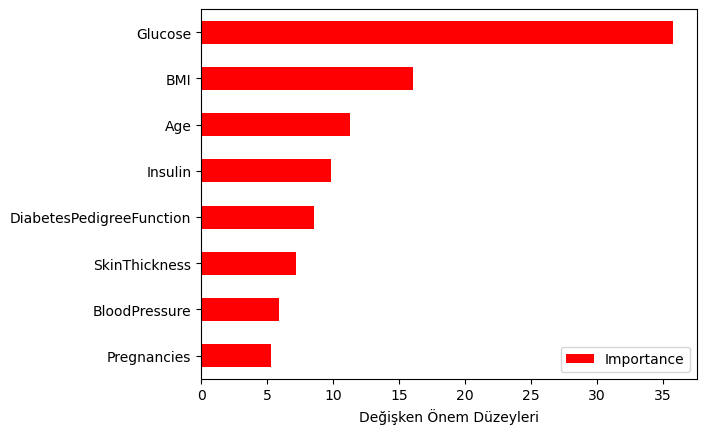

In [41]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

<h1>LightGBM</h1>

<h3>Model</h3>

In [42]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.40, 
                                                    random_state=60)

In [43]:
!pip install lightgbm

In [44]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 155, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336957 -> initscore=-0.676887
[LightGBM] [Info] Start training from score -0.676887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [45]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.737012987012987

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       195
         1.0       0.65      0.60      0.63       113

    accuracy                           0.74       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.73      0.74      0.73       308



<h3>Model Tuning</h3>

In [47]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [48]:
lgbm_params = {
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_samples': [10, 20, 30],
}

n_estimators: Oluşturulacak ağaç sayısını belirtir. 

max_depth: Karar ağaçlarının maksimum derinliğini belirtir.

learning_rate: Bir iterasyondaki ağaçların katkısını kontrol eden öğrenme oranını belirtir. Düşük bir öğrenme oranı, daha kararlı bir model elde etmek için kullanılabilir, ancak daha fazla ağaç gerektirebilir.

min_child_samples: Bir yaprak düğümü oluşturmak için gerekli minimum örnek sayısını belirtir. 

subsample=0.8 demek, her bir ağacın eğitim sırasında yalnızca veri setinin %80'ini kullanacağı anlamına gelir. Bu durumda, her ağaç, orijinal veri setinin rastgele bir %80'ini alarak oluşturulur.

In [49]:
lgbm = LGBMClassifier()

In [50]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv=5, 
                             n_jobs=-1, 
                             scoring='accuracy',
                             verbose=1).fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 155, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336957 -> initscore=-0.676887
[LightGBM] [Info] Start training from score -0.676887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [51]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_samples': 30,
 'n_estimators': 50,
 'subsample': 0.7}

In [52]:
lgbm = LGBMClassifier(learning_rate=0.05, 
                      max_depth=8,
                      subsample=0.7,
                      n_estimators=50,
                      min_child_samples=30)


In [53]:
lgbm_tuned = lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 155, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336957 -> initscore=-0.676887
[LightGBM] [Info] Start training from score -0.676887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [54]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.7402597402597403

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       195
         1.0       0.67      0.57      0.62       113

    accuracy                           0.74       308
   macro avg       0.72      0.70      0.71       308
weighted avg       0.73      0.74      0.73       308



<h1>Tüm Modellerin Karşılaştırılması</h1>


In [56]:
modeller = [
    loj_model,
    nb_model,
    rf_tuned,
    lgbm_tuned,
    
]

for model in modeller:
    isimler = model.__class__.__name__
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 74.0260%
----------------------------
GaussianNB:
Accuracy: 74.0260%
----------------------------
RandomForestClassifier:
Accuracy: 75.9740%
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
----------------------------
LGBMClassifier:
Accuracy: 74.0260%


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
                 Modeller   Accuracy  Precision   Recall  F1 Score
0      LogisticRegression  74.025974   0.734466  0.74026  0.730594
1              GaussianNB  74.025974   0.745996  0.74026  0.742345
2  RandomForestClassifier  75.974026   0.755137  0.75974  0.754644
3          LGBMClassifier  74.025974   0.734634  0.74026  0.734751


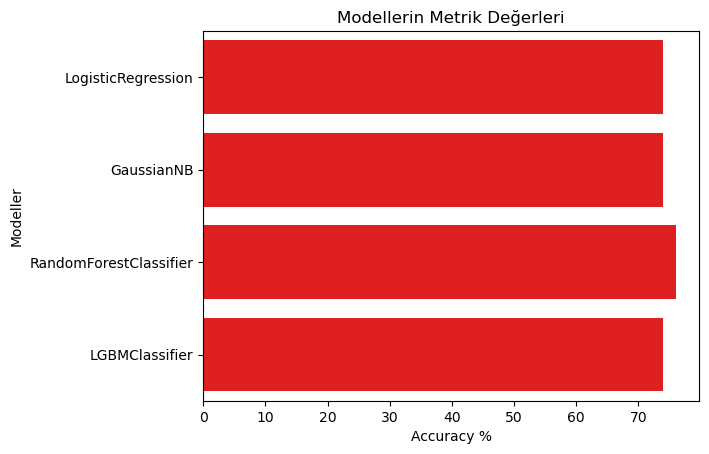

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

sonuc = []

for model in modeller:
    isimler = model.__class__.__name__
    
    if isimler == "MLPClassifier":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    

    dogruluk = accuracy_score(y_test, y_pred)
    keskinlik = precision_score(y_test, y_pred, average='weighted')
    duyarlılık = recall_score(y_test, y_pred, average='weighted')
    f1_skoru = f1_score(y_test, y_pred, average='weighted')
    
    
    sonuc.append({"Modeller": isimler, "Accuracy": dogruluk * 100,
                  "Precision": keskinlik, "Recall": duyarlılık, "F1 Score": f1_skoru})

sonuclar = pd.DataFrame(sonuc, columns=["Modeller", "Accuracy", "Precision", "Recall", "F1 Score"])

sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Metrik Değerleri')

print(sonuclar)
